# Experiment 2.3.1

Goal:</br>
pred_len=24 setting </br>
Check performance of deeper large models than tested in Exp2.3 </br>
Check performance of small models with larger learning rate than in Exp2.3 </br>

Result: </br>
Deeper large model (d_model=512, e_layers=4, d_layers= 3) doesnt improve performance, they do however profit form smaller learning rate (0.0001) </br>
Small models perform better with larger learning rate >0.001

Open question: </br>
Small models: Why is large learning rate with few epochs so much better?

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%pwd

'/Users/timw/Documents/University/thesis_2/scripts/Exp2.3.1'

In [16]:
#%%python3 -u create_hpo_tables.py --exp_name "Exp2.4"

## Import data and plot all benchmark results

In [17]:
hpo_table = pd.read_csv("./../../results/hpo_table_Exp2.3.1_metrics.csv", index_col=0)
hpo_table

,learning_rate,batch_size,e_layers,d_layers,d_model,MSE,MAE,Epochs,Time[min],Params[Mio.],Max_mem[MB]
0,0.00001,32,4,3,512,0.031476,0.129057,12,14,25.2,1391
1,0.00001,64,4,3,512,0.037264,0.141024,12,11,25.2,2308
2,0.00001,128,4,3,512,0.046656,0.159778,14,13,25.2,4264
3,0.00010,32,4,3,512,0.028959,0.121910,7,8,25.2,1391
4,0.00010,64,4,3,512,0.027356,0.118211,9,8,25.2,2308
5,0.00010,128,4,3,512,0.029230,0.124432,12,11,25.2,4264
6,0.00050,32,4,3,512,0.038028,0.145376,4,4,25.2,1391
7,0.00050,64,4,3,512,0.030629,0.127932,13,12,25.2,2308
8,0.00050,128,4,3,512,0.030512,0.129569,11,10,25.2,4264
9,0.00100,32,2,1,32,0.033609,0.133613,9,4,0.0,204


In [18]:
hpo_table.sum(axis=0)

learning_rate        0.052830
batch_size        1568.000000
e_layers            66.000000
d_layers            45.000000
d_model           6432.000000
MSE                  0.709021
MAE                  2.833890
Epochs             176.000000
Time[min]          122.000000
Params[Mio.]       302.400000
Max_mem[MB]      34378.000000
dtype: float64

In [19]:
sorted_df = hpo_table.sort_values(by="MSE")
sorted_df

,learning_rate,batch_size,e_layers,d_layers,d_model,MSE,MAE,Epochs,Time[min],Params[Mio.],Max_mem[MB]
4,0.00010,64,4,3,512,0.027356,0.118211,9,8,25.2,2308
3,0.00010,32,4,3,512,0.028959,0.121910,7,8,25.2,1391
5,0.00010,128,4,3,512,0.029230,0.124432,12,11,25.2,4264
15,0.00500,32,2,1,32,0.029542,0.126759,10,5,0.0,204
8,0.00050,128,4,3,512,0.030512,0.129569,11,10,25.2,4264
7,0.00050,64,4,3,512,0.030629,0.127932,13,12,25.2,2308
20,0.01000,128,2,1,32,0.030634,0.130520,6,1,0.0,377
16,0.00500,64,2,1,32,0.031010,0.130936,5,1,0.0,261
19,0.01000,64,2,1,32,0.031381,0.131574,5,1,0.0,261
0,0.00001,32,4,3,512,0.031476,0.129057,12,14,25.2,1391


In [20]:
best_mse = sorted_df.iloc[0]["MSE"]
best_mse

0.0273564998060464

## Learning rate vs MSE

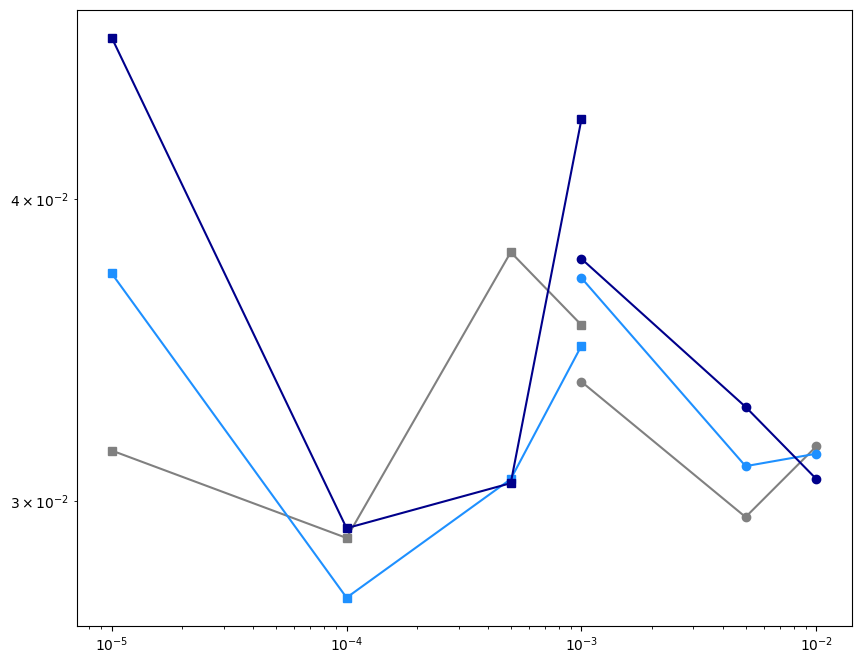

In [21]:
colors = {32: "grey", 64: "dodgerblue", 128: "darkblue"}
markers = {0.0: 'o', 0.7: '^', 25.2: 's'}
batch_sizes = [32, 64, 128]
model_sizes = [25.2, 0.0]

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for ms in model_sizes:
    for bs in batch_sizes:
        hpo_table_subset = hpo_table[(hpo_table["batch_size"] == bs) & (hpo_table["Params[Mio.]"] == ms)]
        ax.plot(hpo_table_subset["learning_rate"], hpo_table_subset["MSE"], color=colors[bs], marker=markers[ms])

ax.set_xscale("log")
ax.set_yscale("log")



## Params[Mio.] vs MSE

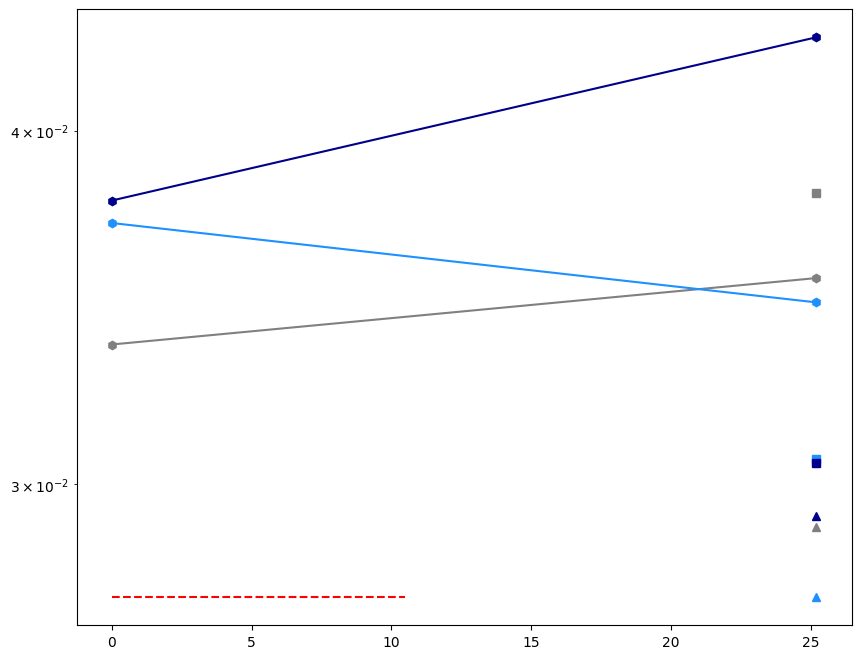

In [22]:
colors = {32: "grey", 64: "dodgerblue", 128: "darkblue"}
markers = {0.00001: 'o', 0.0001: '^', 0.0005: 's', 0.001: 'h'}
batch_sizes = [32, 64, 128]
#model_sizes = [10.5, 1.6, 0.7, 0.0]
learning_rates = [0.0001, 0.0005, 0.001]

hpo_table.sort_values(by="Params[Mio.]", inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for lr in learning_rates:
    for bs in batch_sizes:
        hpo_table_subset = hpo_table[(hpo_table["batch_size"] == bs) & (hpo_table["learning_rate"] == lr)]
        #print(hpo_table_subset)
        ax.plot(hpo_table_subset["Params[Mio.]"], hpo_table_subset["MSE"], color=colors[bs], marker=markers[lr])

ax.set_yscale("log")
ax.hlines(best_mse, 0,10.5, color="red", linestyles="--")
#ax.set_ylim(0.02, 0.08)



In [23]:
hpo_table.sort_values(by=["Params[Mio.]","MSE"], inplace=True)
hpo_table

,learning_rate,batch_size,e_layers,d_layers,d_model,MSE,MAE,Epochs,Time[min],Params[Mio.],Max_mem[MB]
15,0.00500,32,2,1,32,0.029542,0.126759,10,5,0.0,204
20,0.01000,128,2,1,32,0.030634,0.130520,6,1,0.0,377
16,0.00500,64,2,1,32,0.031010,0.130936,5,1,0.0,261
19,0.01000,64,2,1,32,0.031381,0.131574,5,1,0.0,261
18,0.01000,32,2,1,32,0.031601,0.131697,9,4,0.0,204
17,0.00500,128,2,1,32,0.032814,0.132601,11,2,0.0,377
9,0.00100,32,2,1,32,0.033609,0.133613,9,4,0.0,204
11,0.00100,64,2,1,32,0.037105,0.143349,6,1,0.0,261
13,0.00100,128,2,1,32,0.037789,0.144240,9,1,0.0,377
4,0.00010,64,4,3,512,0.027356,0.118211,9,8,25.2,2308


In [24]:
reduced_hpo_table = hpo_table[["learning_rate", "batch_size", "Params[Mio.]", "MSE"]]
print(reduced_hpo_table.shape)

(21, 4)


In [25]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib.colors import Normalize
import numpy as np


def parallel_coordinates(data, column_names, threshold=None, ynames=None):
    fig, host = plt.subplots(figsize=(10, 6))

    if threshold is not None:
        data = data[data["MSE"] < threshold]
    
    if ynames is None:
        ynames = column_names
    else:
        ynames = ynames

    data = data[column_names]
    ys = data.to_numpy()
    N = ys.shape[0]

    print(ys.shape)

    ymins = ys.min(axis=0)
    ymaxs = ys.max(axis=0)
    dys = ymaxs - ymins
    ymins -= dys * 0.05  # add 5% padding below and above
    ymaxs += dys * 0.05
    dys = ymaxs - ymins

    # transform all data to be compatible with the main axis
    zs = np.zeros_like(ys)
    zs[:, 0] = ys[:, 0]
    zs[:, 1:] = (ys[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]

    # Add small horizontal jitter
    jitter_strength = 0.0001  # Adjust this value based on your data range
    jitter = np.random.normal(0, jitter_strength, zs.shape)
    jitter[:, -1] = 0  # Don't jitter the last column

    zs += jitter


    axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]
    for i, ax in enumerate(axes):
        ax.set_ylim(ymins[i], ymaxs[i])
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        if ax != host:
            ax.spines['left'].set_visible(False)
            ax.yaxis.set_ticks_position('right')
            ax.spines["right"].set_position(("axes", i / (ys.shape[1] - 1)))
            #ax.set_yscale('log')


    axes[-1].set_yscale('log')

    #axes[-2].set_yscale('log')
    #axes[-3].set_yscale('log')

    host.set_xlim(0, ys.shape[1] - 1)
    host.set_xticks(range(ys.shape[1]))
    host.set_xticklabels(ynames, fontsize=14)
    host.tick_params(axis='x', which='major', pad=7)
    host.spines['right'].set_visible(False)
    host.xaxis.tick_top()
    host.set_title('Parallel Coordinates Plot', fontsize=18)

    # Use a colormap and normalize based on the last column of ys
    color_norm = Normalize(vmin=ys[:, -1].min(), vmax=ys[:, -1].max())
    cmap = plt.get_cmap('viridis')

    for j in range(N):
        color = cmap(color_norm(ys[j, -1]))
        verts = list(zip([x for x in np.linspace(0, len(ys) - 1, len(ys) * 3 - 2, endpoint=True)], np.repeat(zs[j, :], 3)[1:-1]))
        codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
        path = Path(verts, codes)
        patch = patches.PathPatch(path, facecolor='none', lw=1, edgecolor=color)
        host.add_patch(patch)

    plt.tight_layout()
    plt.show()


(21, 4)


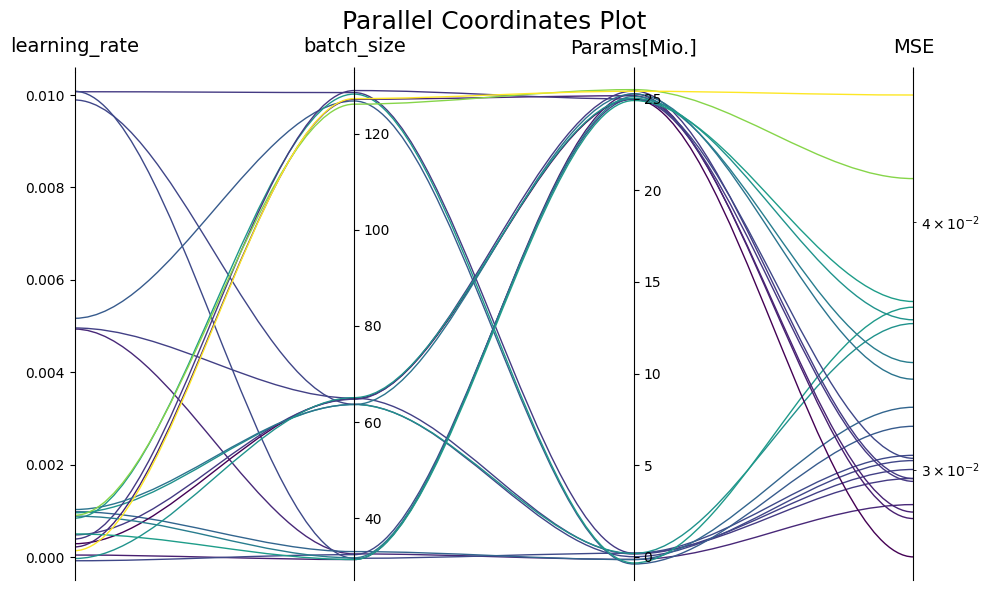

In [26]:
parallel_coordinates(reduced_hpo_table, ["learning_rate", "batch_size", "Params[Mio.]", "MSE"])

(21, 4)


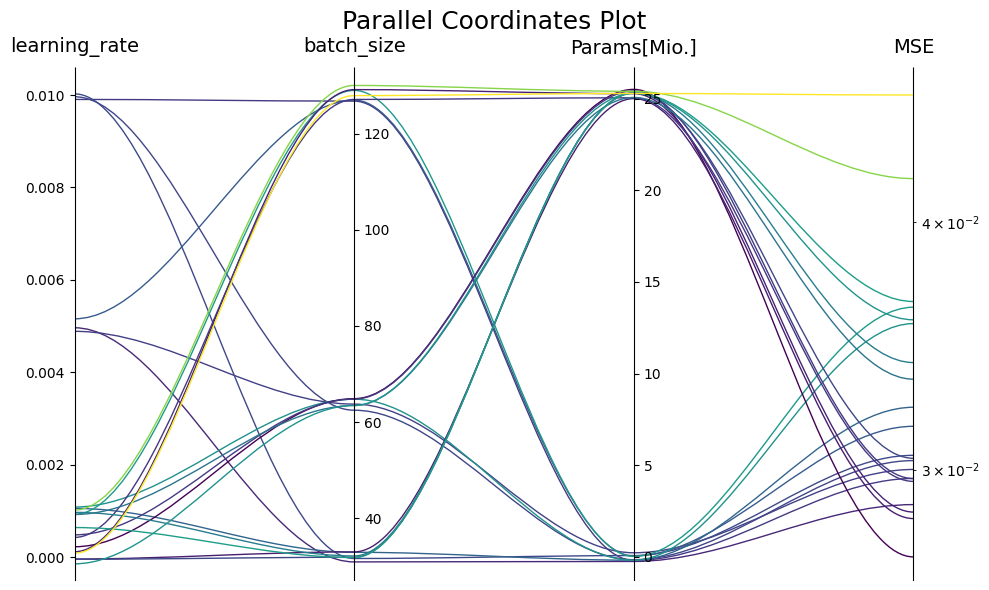

(14, 4)


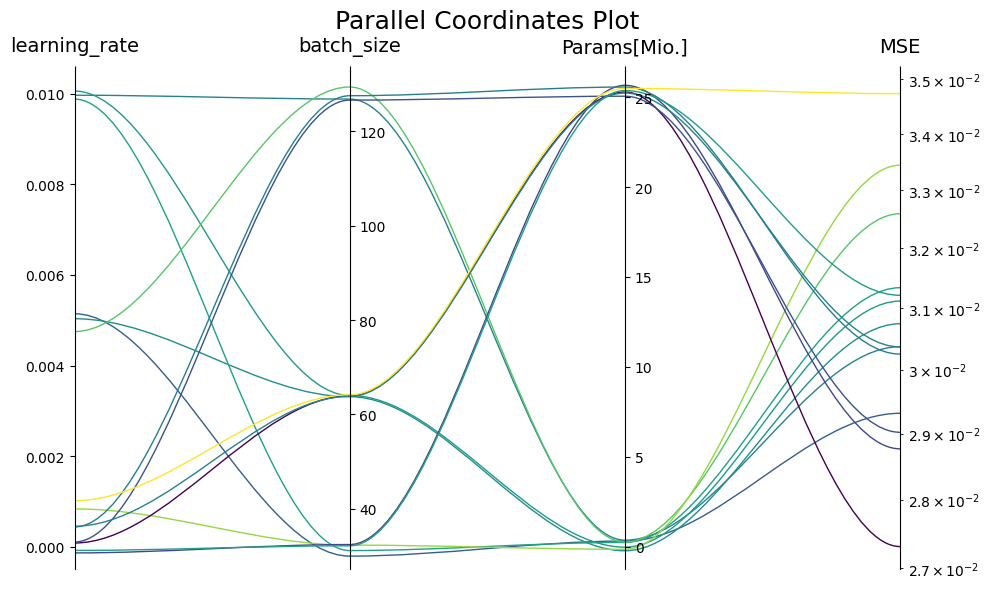

In [27]:
parallel_coordinates(reduced_hpo_table, ["learning_rate", "batch_size", "Params[Mio.]", "MSE"], threshold=0.1)
parallel_coordinates(reduced_hpo_table, ["learning_rate", "batch_size", "Params[Mio.]", "MSE"], threshold=0.035)

(9, 3)


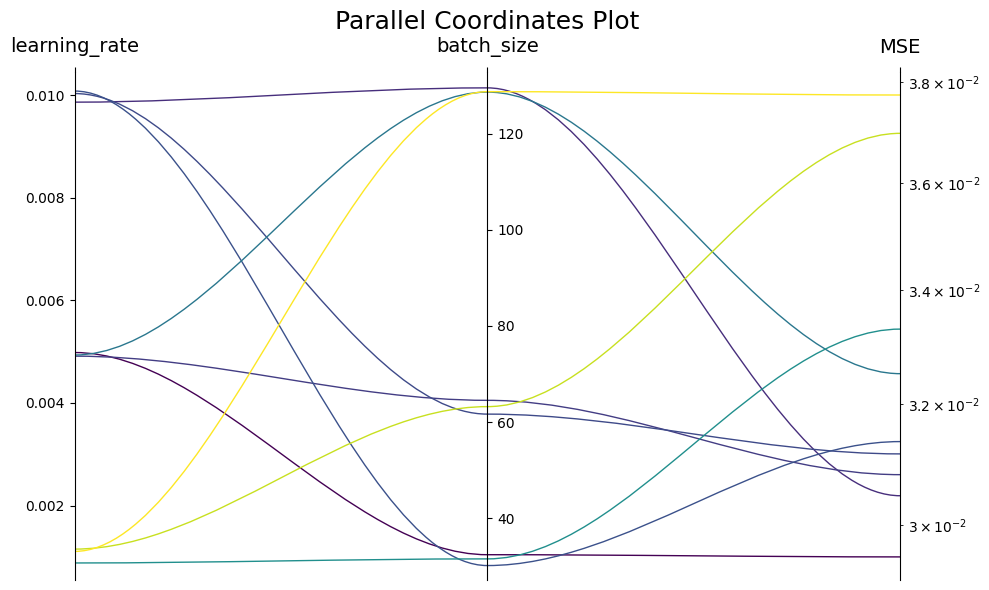

In [28]:
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 0.0], ["learning_rate", "batch_size", "MSE"])

(0, 3)


ValueError: zero-size array to reduction operation minimum which has no identity

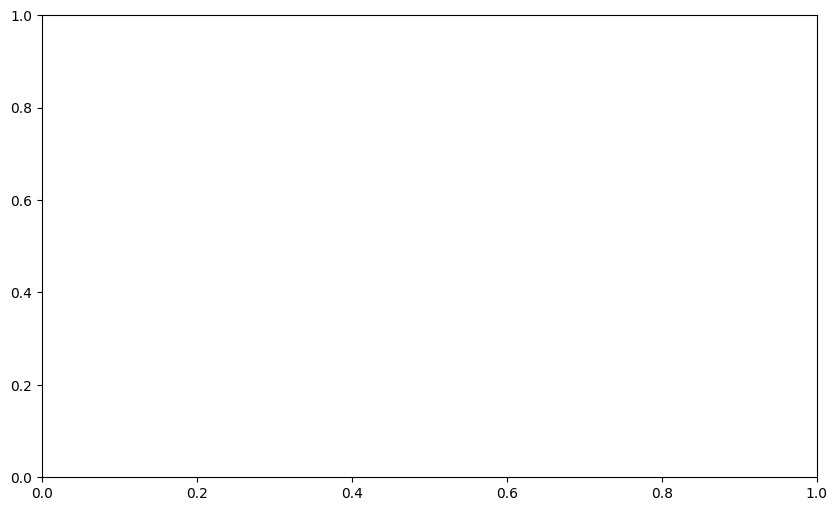

In [29]:
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 1.6], ["learning_rate", "batch_size", "MSE"])
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 1.6], ["learning_rate", "batch_size", "MSE"], threshold = 0.08)

(12, 3)


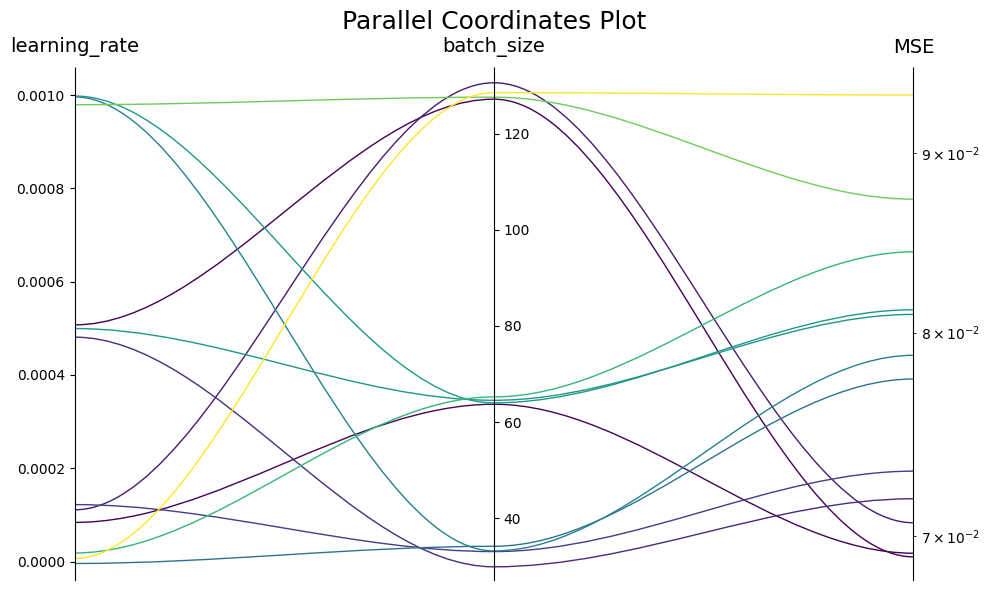

(7, 3)


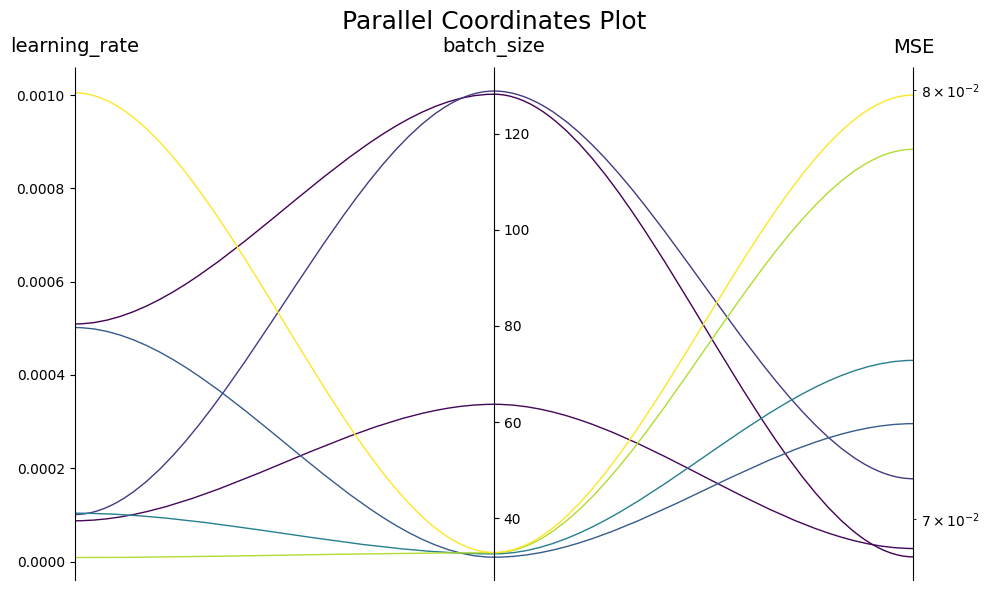

In [ ]:
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 10.5], ["learning_rate", "batch_size", "MSE"])
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 10.5], ["learning_rate", "batch_size", "MSE"], threshold=0.08)